In [93]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [8]:
# set configuration
sample_size = 100
nr_sample = 20
nr_moments = 10

# classificatio
test_size = 0.2
cv = 5
cv_config = [test_size, cv]

## Bounded distributions

In [9]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [10]:
moments_df = dem.get_moments_df(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,dist
0,0.482645,0.114165,0.003148,0.020997,0.001203,0.004389,0.000366,0.000970,0.000105,0.000221,arcsine
1,0.458979,0.116094,0.001410,0.020918,0.001041,0.004205,0.000409,0.000897,0.000134,0.000200,arcsine
2,0.516576,0.133172,-0.000506,0.025223,-0.000697,0.005299,-0.000326,0.001171,-0.000116,0.000267,arcsine


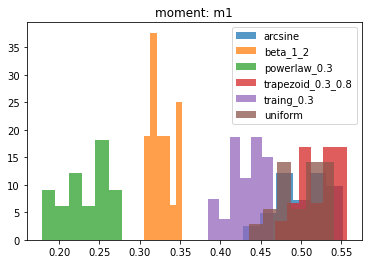

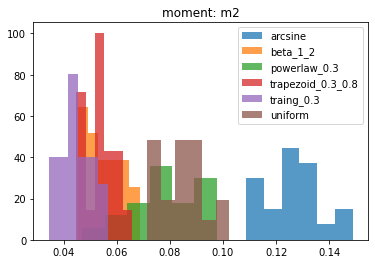

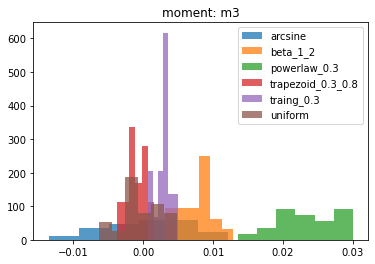

In [13]:
dem.get_histogram_of_moments(moments_df)

In [11]:
# setting values for cross validation
sample_size_list = [5, 10, 25, 50, 100, 200, 500, 750, 1000]
nr_moments_list = list(range(2,31))

### svm

In [25]:
res_svm = cm.cv_samplesize_moments(sample_size_list, nr_moments_list,bounded_dists, nr_sample, cv_config, 1)

Completed:   0%|          | 0/9 [00:00<?, ?it/s]

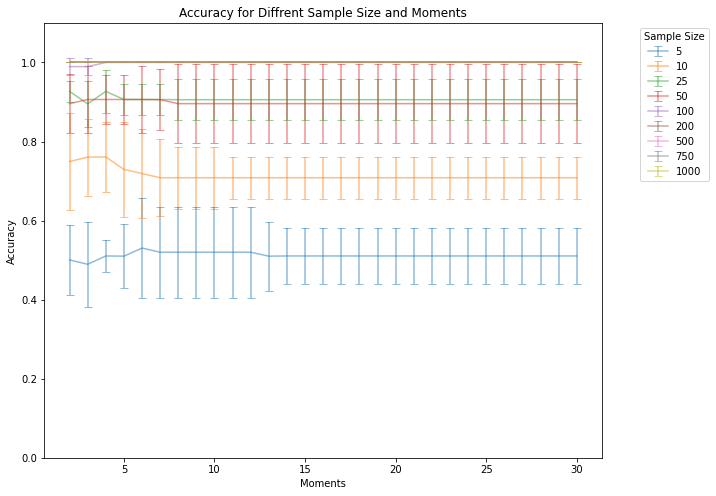

In [26]:
cm.plot_cv_moments(res_svm, errbar=1)

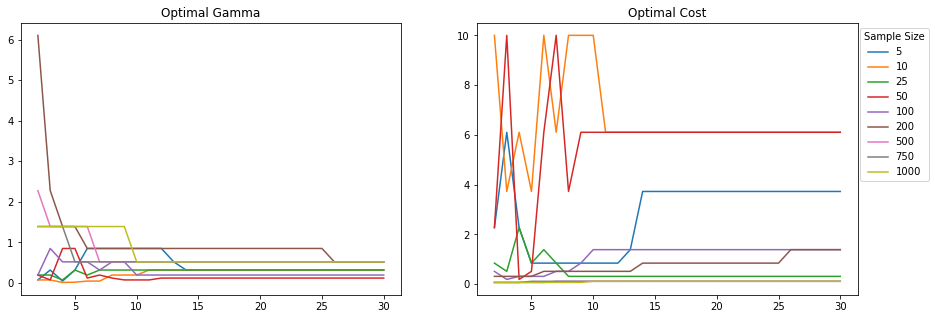

In [94]:
cm.plot_cv_h_params(res_svm)

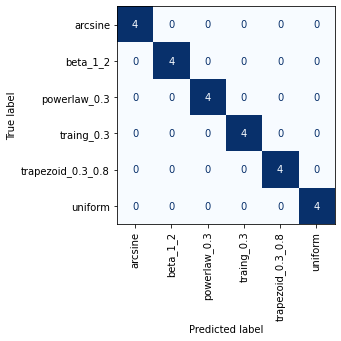

array([1., 1., 1., 1., 1.])

In [94]:
cm.svm_model(moments_df, test_size, cv, plot=1)

### Logistic Regression

In [55]:
res_lr = cm.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample, cv_config, 2)

Completed:   0%|          | 0/9 [00:00<?, ?it/s]

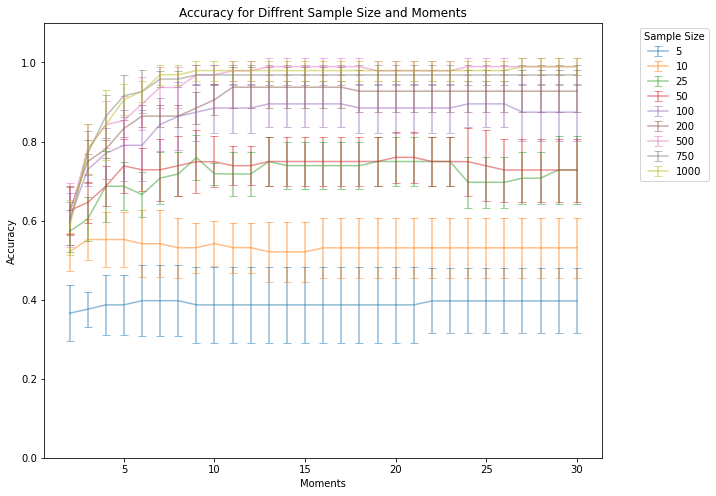

In [88]:
cm.plot_cv_moments(res_lr, errbar=1)

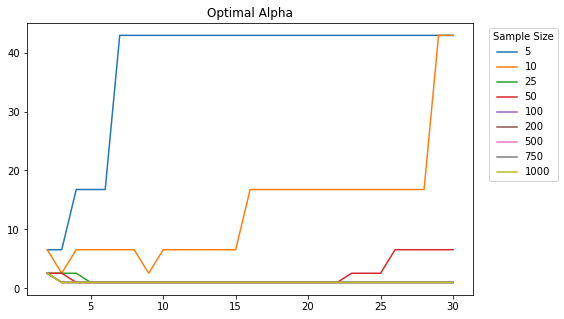

In [91]:
cm.plot_cv_h_params(res_lr)

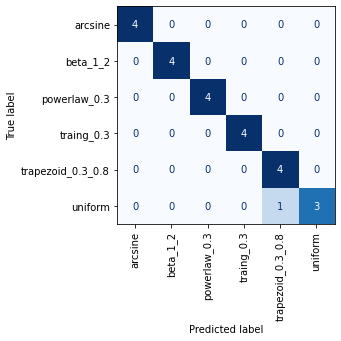

array([1.        , 1.        , 1.        , 1.        , 0.94736842])

In [95]:
cm.rr_model(moments_df, 0.2, 5, plot=1)

In [ ]:
    fig, ax = plt.subplots(figsize=(10,8))
    for i in range(len(acc)):
        plt.plot(step_size_list, acc[i], label=str(num_steps_list[i]), alpha = 0.5)
        plt.title('accuracy for different step size and number of steps, sample size =%d' % sample_config[0])
        plt.xlabel('step size')
        plt.ylabel('accuracy')
        
        pos = ax.get_position()
        ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='number of steps')
    plt.show()

## Heavytail distributions

In [148]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size, transform = True)
#dm.plot_histograms_of_samples(heavytail_samples)

In [149]:
moments_df = dem.get_moments_df(heavytail_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,dist
0,0.906323,0.701042,1.198702,4.458962,16.536132,69.161561,304.750287,1397.749692,6.585472e+03,3.163795e+04,cauchy
1,0.954382,0.849383,2.335148,15.789452,128.310374,1177.439195,11326.681809,111380.750493,1.107291e+06,1.107321e+07,cauchy
2,0.892982,0.745894,1.317818,4.790895,17.551839,73.204651,326.456891,1537.009258,7.528564e+03,3.800189e+04,cauchy


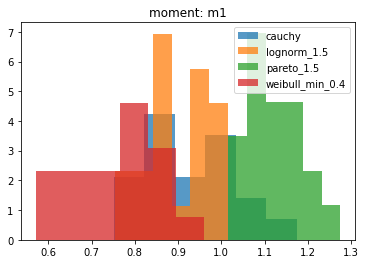

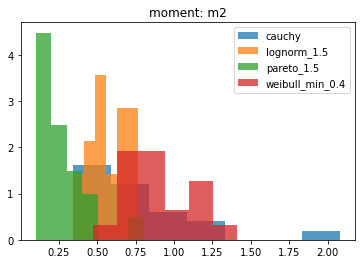

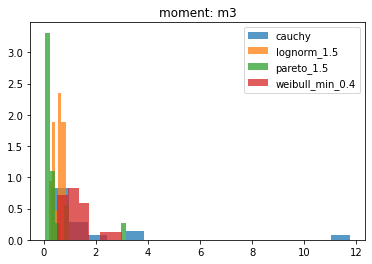

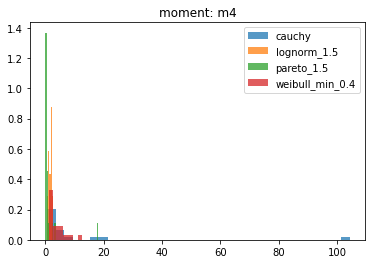

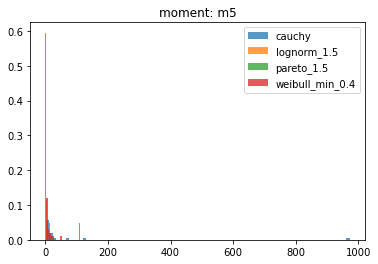

In [146]:
dem.get_histogram_of_moments(moments_df)

### SVM

In [143]:
acc_ht, std_ht = cm.cv_moments_sample_size(sample_size_list, nr_moments_list, heavytail_dists, 20, cv_config, 1, transform = True)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

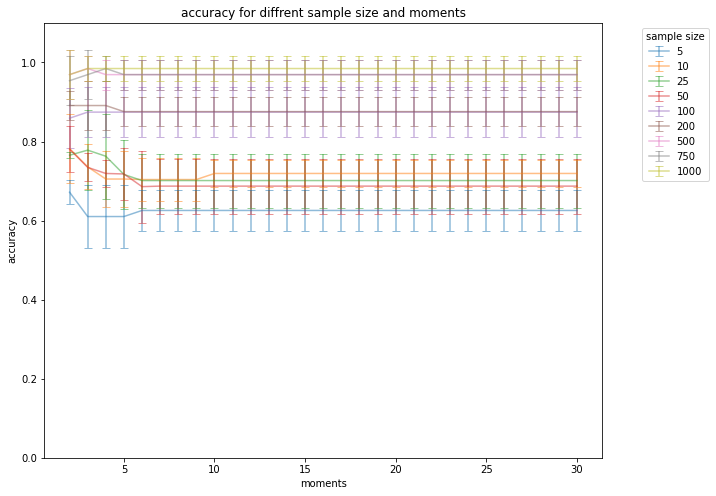

In [144]:
cm.plot_cv_moments(sample_size_list, nr_moments_list, acc_ht, std_ht, errbar=1)

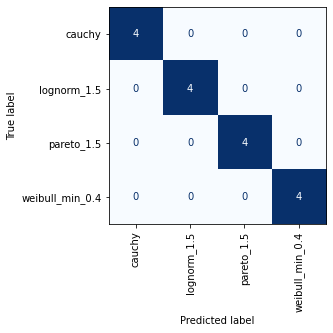

array([1.        , 1.        , 1.        , 0.92307692, 1.        ])

In [150]:
cm.svm_model(moments_df, test_size, cv, plot=1)

### Logistic Regression

In [141]:
acc_rr_ht, std_rr_ht = cm.cv_moments_sample_size(sample_size_list, 
                                                 nr_moments_list, 
                                                 heavytail_dists, 
                                                 20, 
                                                 cv_config, 
                                                 2, 
                                                 transform= True)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

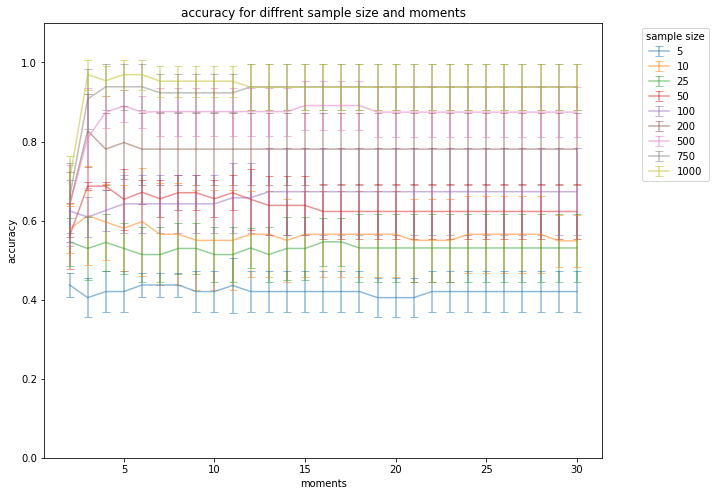

In [142]:
cm.plot_cv_moments(sample_size_list, nr_moments_list, acc_rr_ht, std_rr_ht, errbar=1)

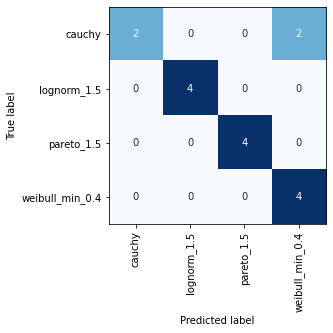

array([1.        , 0.92307692, 1.        , 0.92307692, 0.91666667])

In [152]:
cm.rr_model(moments_df, test_size, cv, plot=1)